# Introduction to neural networks
In this notebook we will start with the basics of neural networks for tasks such as regression and classification.

## Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of either TensorFlow or Theano, as well as other frameworks. It was developed with a focus on enabling fast experimentation.



## Exercise 1 (Regression)

The first talk we are going to solve using neural networks is Regression. This is a supervised machine learning task, where the goal is to approximate an underlying function based on data observations. For this exercise the underlying function will be 
$$ f: \mathbb{R} \rightarrow \mathbb{R}$$
$$ f(x) = 10\sin(\pi x^2) + 20 (x-0.5)^ 2 + 15 *x$$

**a)** Construct a dataset by first generating $500$ uniformly distributed $x_i$-samples and then computing $y_i = f(x_i) + 5\eta_i$ where $\eta_i \sim \mathcal{N}(0,1)$. Create a plot with the data-points and the underlying function.


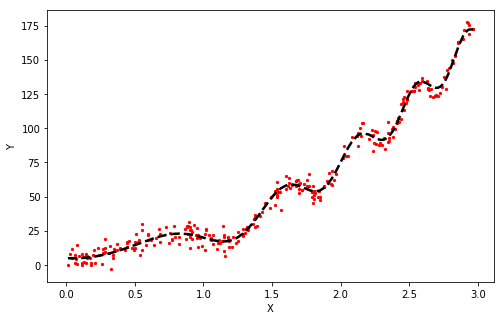

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

X = np.sort(np.random.uniform(0, 3, 300))
Y_true = 10 * np.sin(np.pi * X * X) + 20 * (X - 0.5) ** 2 + 15 * X 
Y = Y_true + np.random.normal(size=X.shape) * 5

plt.figure(figsize=(8,5))
plt.scatter(X, Y, color='red', s=5)
plt.plot(X, Y_true, color='black', linestyle='--', linewidth=2.5)

plt.xlabel('X')
plt.ylabel('Y');

**b)** Split the data set into **training**, and **validation** sets and scale the values for achieving faster convergence. Plot the training points and the testing points with different colors.

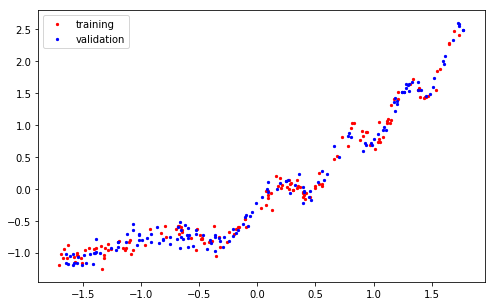

In [2]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

X = scale(X)
Y = scale(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

plt.figure(figsize=(8,5))
plt.scatter(X_train, Y_train, color='red', s=5, label='training')
plt.scatter(X_test, Y_test, color='blue', s=5, label='validation')
plt.legend()

**c)** Create a feed-forward neural network with one hidden layer. Train the network using the training set. Play around with the number of neurons and the number of layers to give more o less complexity to the model.

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam


model = Sequential()

hidden1 = Dense(10, input_dim=1, activation='tanh')
hidden2 = Dense(5, activation='tanh')
output = Dense(1, activation='linear')

model.add(hidden1)   
model.add(hidden2)   
model.add(output)

model.compile(optimizer=adam(0.01), loss='mse')

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [4]:
h = model.fit(X_train, Y_train, epochs=5000, verbose=1, validation_data=(X_test, Y_test), batch_size=32)

Instructions for updating:
Use tf.cast instead.
Train on 150 samples, validate on 150 samples
Epoch 1/5000
150/150 [==============================] - 0s 3ms/step - loss: 2.1517 - val_loss: 1.5431
Epoch 2/5000
150/150 [==============================] - 0s 73us/step - loss: 0.8912 - val_loss: 0.5346
Epoch 3/5000
150/150 [==============================] - 0s 73us/step - loss: 0.2735 - val_loss: 0.1671
Epoch 4/5000
150/150 [==============================] - 0s 73us/step - loss: 0.1301 - val_loss: 0.1721
Epoch 5/5000
150/150 [==============================] - 0s 67us/step - loss: 0.1748 - val_loss: 0.1961
Epoch 6/5000
150/150 [==============================] - 0s 73us/step - loss: 0.1723 - val_loss: 0.1612
Epoch 7/5000
150/150 [==============================] - 0s 80us/step - loss: 0.1200 - val_loss: 0.1218
Epoch 8/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0840 - val_loss: 0.1146
Epoch 9/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0787

150/150 [==============================] - 0s 133us/step - loss: 0.0305 - val_loss: 0.0336
Epoch 77/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0309 - val_loss: 0.0320
Epoch 78/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0303 - val_loss: 0.0332
Epoch 79/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0303 - val_loss: 0.0326
Epoch 80/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0316 - val_loss: 0.0317
Epoch 81/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0302 - val_loss: 0.0351
Epoch 82/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0307 - val_loss: 0.0333
Epoch 83/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0299 - val_loss: 0.0319
Epoch 84/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0303 - val_loss: 0.0317
Epoch 85/5000
150/150 [==============================] - 0s 87us/step - loss:

Epoch 154/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0298 - val_loss: 0.0294
Epoch 155/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0287 - val_loss: 0.0314
Epoch 156/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0292 - val_loss: 0.0314
Epoch 157/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0290 - val_loss: 0.0305
Epoch 158/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0291 - val_loss: 0.0294
Epoch 159/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0288 - val_loss: 0.0308
Epoch 160/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0287 - val_loss: 0.0308
Epoch 161/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0288 - val_loss: 0.0302
Epoch 162/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0287 - val_loss: 0.0300
Epoch 163/5000
150/150 [==============================]

150/150 [==============================] - 0s 80us/step - loss: 0.0291 - val_loss: 0.0299
Epoch 232/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0294 - val_loss: 0.0283
Epoch 233/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0284 - val_loss: 0.0293
Epoch 234/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0287 - val_loss: 0.0293
Epoch 235/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0290 - val_loss: 0.0282
Epoch 236/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0281 - val_loss: 0.0294
Epoch 237/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0293 - val_loss: 0.0293
Epoch 238/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0280 - val_loss: 0.0292
Epoch 239/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0282 - val_loss: 0.0296
Epoch 240/5000
150/150 [==============================] - 0s 67us/ste

Epoch 309/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0280 - val_loss: 0.0281
Epoch 310/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0297 - val_loss: 0.0292
Epoch 311/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0280 - val_loss: 0.0280
Epoch 312/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0281 - val_loss: 0.0296
Epoch 313/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0277 - val_loss: 0.0285
Epoch 314/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0281 - val_loss: 0.0284
Epoch 315/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0281 - val_loss: 0.0281
Epoch 316/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0279 - val_loss: 0.0294
Epoch 317/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0276 - val_loss: 0.0277
Epoch 318/5000
150/150 [==============================]

Epoch 387/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0282 - val_loss: 0.0284
Epoch 388/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0283 - val_loss: 0.0274
Epoch 389/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0277 - val_loss: 0.0298
Epoch 390/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0279 - val_loss: 0.0281
Epoch 391/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0282 - val_loss: 0.0293
Epoch 392/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0276 - val_loss: 0.0280
Epoch 393/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0277 - val_loss: 0.0277
Epoch 394/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0280 - val_loss: 0.0277
Epoch 395/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0285 - val_loss: 0.0281
Epoch 396/5000
150/150 [==============================]

150/150 [==============================] - 0s 87us/step - loss: 0.0299 - val_loss: 0.0274
Epoch 465/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0284 - val_loss: 0.0298
Epoch 466/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0303 - val_loss: 0.0276
Epoch 467/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0303 - val_loss: 0.0320
Epoch 468/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0279 - val_loss: 0.0280
Epoch 469/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0287 - val_loss: 0.0288
Epoch 470/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0284 - val_loss: 0.0291
Epoch 471/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0271 - val_loss: 0.0280
Epoch 472/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0283 - val_loss: 0.0277
Epoch 473/5000
150/150 [==============================] - 0s 80us/step

Epoch 542/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0278 - val_loss: 0.0275
Epoch 543/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0271 - val_loss: 0.0275
Epoch 544/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0270 - val_loss: 0.0282
Epoch 545/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0285 - val_loss: 0.0278
Epoch 546/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0288 - val_loss: 0.0267
Epoch 547/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0291 - val_loss: 0.0291
Epoch 548/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0284 - val_loss: 0.0281
Epoch 549/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0274 - val_loss: 0.0282
Epoch 550/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0276 - val_loss: 0.0278
Epoch 551/5000
150/150 [==============================]

Epoch 620/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0309 - val_loss: 0.0317
Epoch 621/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0313 - val_loss: 0.0281
Epoch 622/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0284 - val_loss: 0.0305
Epoch 623/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0283 - val_loss: 0.0296
Epoch 624/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0285 - val_loss: 0.0268
Epoch 625/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0284 - val_loss: 0.0288
Epoch 626/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0287 - val_loss: 0.0275
Epoch 627/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0272 - val_loss: 0.0297
Epoch 628/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0269 - val_loss: 0.0268
Epoch 629/5000
150/150 [==============================]

Epoch 698/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0264 - val_loss: 0.0270
Epoch 699/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0265 - val_loss: 0.0267
Epoch 700/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0276 - val_loss: 0.0268
Epoch 701/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0265 - val_loss: 0.0268
Epoch 702/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0266 - val_loss: 0.0263
Epoch 703/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0271 - val_loss: 0.0271
Epoch 704/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0264 - val_loss: 0.0259
Epoch 705/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0266 - val_loss: 0.0261
Epoch 706/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0275 - val_loss: 0.0286
Epoch 707/5000
150/150 [==============================]

150/150 [==============================] - 0s 80us/step - loss: 0.0264 - val_loss: 0.0263
Epoch 777/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0254 - val_loss: 0.0244
Epoch 778/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0247 - val_loss: 0.0265
Epoch 779/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0261 - val_loss: 0.0241
Epoch 780/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0252 - val_loss: 0.0237
Epoch 781/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0242 - val_loss: 0.0238
Epoch 782/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0245 - val_loss: 0.0241
Epoch 783/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0248 - val_loss: 0.0231
Epoch 784/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0250 - val_loss: 0.0232
Epoch 785/5000
150/150 [==============================] - 0s 73us/step

Epoch 854/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0219 - val_loss: 0.0214
Epoch 855/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0215 - val_loss: 0.0210
Epoch 856/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0217 - val_loss: 0.0206
Epoch 857/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0224 - val_loss: 0.0205
Epoch 858/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0217 - val_loss: 0.0205
Epoch 859/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0214 - val_loss: 0.0212
Epoch 860/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0221 - val_loss: 0.0205
Epoch 861/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0237 - val_loss: 0.0200
Epoch 862/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0223 - val_loss: 0.0263
Epoch 863/5000
150/150 [==============================]

Epoch 932/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0202 - val_loss: 0.0205
Epoch 933/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0211 - val_loss: 0.0206
Epoch 934/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0205 - val_loss: 0.0211
Epoch 935/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0207 - val_loss: 0.0199
Epoch 936/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0199 - val_loss: 0.0214
Epoch 937/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0200 - val_loss: 0.0198
Epoch 938/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0199 - val_loss: 0.0199
Epoch 939/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0214 - val_loss: 0.0209
Epoch 940/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0205 - val_loss: 0.0206
Epoch 941/5000
150/150 [==============================]

Epoch 1010/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0204 - val_loss: 0.0227
Epoch 1011/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0199 - val_loss: 0.0202
Epoch 1012/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0194 - val_loss: 0.0210
Epoch 1013/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0197 - val_loss: 0.0203
Epoch 1014/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0195 - val_loss: 0.0198
Epoch 1015/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0211 - val_loss: 0.0224
Epoch 1016/5000
150/150 [==============================] - 0s 160us/step - loss: 0.0221 - val_loss: 0.0198
Epoch 1017/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0204 - val_loss: 0.0269
Epoch 1018/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0221 - val_loss: 0.0198
Epoch 1019/5000
150/150 [====================

150/150 [==============================] - 0s 60us/step - loss: 0.0188 - val_loss: 0.0210
Epoch 1088/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0186 - val_loss: 0.0194
Epoch 1089/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0180 - val_loss: 0.0201
Epoch 1090/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0180 - val_loss: 0.0196
Epoch 1091/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0185 - val_loss: 0.0200
Epoch 1092/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0185 - val_loss: 0.0212
Epoch 1093/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0195 - val_loss: 0.0193
Epoch 1094/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0181 - val_loss: 0.0206
Epoch 1095/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0186 - val_loss: 0.0201
Epoch 1096/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 73us/step - loss: 0.0177 - val_loss: 0.0188
Epoch 1165/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0174 - val_loss: 0.0211
Epoch 1166/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0173 - val_loss: 0.0189
Epoch 1167/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0176 - val_loss: 0.0196
Epoch 1168/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0191 - val_loss: 0.0205
Epoch 1169/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0175 - val_loss: 0.0188
Epoch 1170/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0181 - val_loss: 0.0214
Epoch 1171/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0176 - val_loss: 0.0186
Epoch 1172/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0177 - val_loss: 0.0187
Epoch 1173/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 67us/step - loss: 0.0168 - val_loss: 0.0189
Epoch 1242/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0172 - val_loss: 0.0189
Epoch 1243/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0167 - val_loss: 0.0184
Epoch 1244/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0168 - val_loss: 0.0202
Epoch 1245/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0170 - val_loss: 0.0181
Epoch 1246/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0176 - val_loss: 0.0185
Epoch 1247/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0171 - val_loss: 0.0190
Epoch 1248/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0171 - val_loss: 0.0192
Epoch 1249/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0177 - val_loss: 0.0183
Epoch 1250/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 87us/step - loss: 0.0186 - val_loss: 0.0186
Epoch 1319/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0175 - val_loss: 0.0184
Epoch 1320/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0173 - val_loss: 0.0212
Epoch 1321/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0171 - val_loss: 0.0180
Epoch 1322/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0181 - val_loss: 0.0195
Epoch 1323/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0171 - val_loss: 0.0189
Epoch 1324/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0170 - val_loss: 0.0181
Epoch 1325/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0168 - val_loss: 0.0182
Epoch 1326/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0172 - val_loss: 0.0190
Epoch 1327/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 80us/step - loss: 0.0180 - val_loss: 0.0209
Epoch 1396/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0192 - val_loss: 0.0176
Epoch 1397/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0181 - val_loss: 0.0202
Epoch 1398/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0171 - val_loss: 0.0184
Epoch 1399/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0187 - val_loss: 0.0187
Epoch 1400/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0192 - val_loss: 0.0202
Epoch 1401/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0171 - val_loss: 0.0172
Epoch 1402/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0174 - val_loss: 0.0184
Epoch 1403/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0172 - val_loss: 0.0190
Epoch 1404/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 73us/step - loss: 0.0161 - val_loss: 0.0177
Epoch 1473/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0165 - val_loss: 0.0179
Epoch 1474/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0166 - val_loss: 0.0175
Epoch 1475/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0162 - val_loss: 0.0191
Epoch 1476/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0161 - val_loss: 0.0177
Epoch 1477/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0171 - val_loss: 0.0182
Epoch 1478/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0163 - val_loss: 0.0172
Epoch 1479/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0168 - val_loss: 0.0190
Epoch 1480/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0155 - val_loss: 0.0183
Epoch 1481/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 60us/step - loss: 0.0167 - val_loss: 0.0176
Epoch 1550/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0160 - val_loss: 0.0178
Epoch 1551/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0158 - val_loss: 0.0180
Epoch 1552/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0161 - val_loss: 0.0170
Epoch 1553/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0159 - val_loss: 0.0176
Epoch 1554/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0161 - val_loss: 0.0172
Epoch 1555/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0163 - val_loss: 0.0178
Epoch 1556/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0164 - val_loss: 0.0168
Epoch 1557/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0164 - val_loss: 0.0183
Epoch 1558/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 80us/step - loss: 0.0176 - val_loss: 0.0187
Epoch 1627/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0169 - val_loss: 0.0178
Epoch 1628/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0178 - val_loss: 0.0173
Epoch 1629/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0156 - val_loss: 0.0185
Epoch 1630/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0159 - val_loss: 0.0173
Epoch 1631/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0156 - val_loss: 0.0185
Epoch 1632/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0161 - val_loss: 0.0168
Epoch 1633/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0156 - val_loss: 0.0177
Epoch 1634/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0163 - val_loss: 0.0176
Epoch 1635/5000
150/150 [==============================] - 0s

150/150 [==============================] - 0s 67us/step - loss: 0.0161 - val_loss: 0.0169
Epoch 1704/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0153 - val_loss: 0.0169
Epoch 1705/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0156 - val_loss: 0.0180
Epoch 1706/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0154 - val_loss: 0.0164
Epoch 1707/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0152 - val_loss: 0.0179
Epoch 1708/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0159 - val_loss: 0.0165
Epoch 1709/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0153 - val_loss: 0.0167
Epoch 1710/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0157 - val_loss: 0.0167
Epoch 1711/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0167 - val_loss: 0.0177
Epoch 1712/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 60us/step - loss: 0.0164 - val_loss: 0.0190
Epoch 1781/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0148 - val_loss: 0.0170
Epoch 1782/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0159 - val_loss: 0.0177
Epoch 1783/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0152 - val_loss: 0.0161
Epoch 1784/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0148 - val_loss: 0.0159
Epoch 1785/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0155 - val_loss: 0.0161
Epoch 1786/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0164 - val_loss: 0.0158
Epoch 1787/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0166 - val_loss: 0.0180
Epoch 1788/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0154 - val_loss: 0.0171
Epoch 1789/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 80us/step - loss: 0.0143 - val_loss: 0.0159
Epoch 1858/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0146 - val_loss: 0.0167
Epoch 1859/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0145 - val_loss: 0.0156
Epoch 1860/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0148 - val_loss: 0.0159
Epoch 1861/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0157 - val_loss: 0.0163
Epoch 1862/5000
150/150 [==============================] - ETA: 0s - loss: 0.014 - 0s 73us/step - loss: 0.0144 - val_loss: 0.0154
Epoch 1863/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0141 - val_loss: 0.0182
Epoch 1864/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0155 - val_loss: 0.0153
Epoch 1865/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0150 - val_loss: 0.0159
Epoch 1866/5000
150/150 [=============

150/150 [==============================] - 0s 93us/step - loss: 0.0140 - val_loss: 0.0169
Epoch 1934/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0141 - val_loss: 0.0148
Epoch 1935/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0154 - val_loss: 0.0154
Epoch 1936/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0138 - val_loss: 0.0173
Epoch 1937/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0145 - val_loss: 0.0152
Epoch 1938/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0149 - val_loss: 0.0164
Epoch 1939/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0139 - val_loss: 0.0146
Epoch 1940/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0143 - val_loss: 0.0159
Epoch 1941/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0145 - val_loss: 0.0150
Epoch 1942/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 73us/step - loss: 0.0137 - val_loss: 0.0144
Epoch 2011/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0137 - val_loss: 0.0146
Epoch 2012/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0139 - val_loss: 0.0153
Epoch 2013/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0134 - val_loss: 0.0141
Epoch 2014/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0136 - val_loss: 0.0148
Epoch 2015/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0133 - val_loss: 0.0151
Epoch 2016/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0148 - val_loss: 0.0143
Epoch 2017/5000
150/150 [==============================] - ETA: 0s - loss: 0.011 - 0s 87us/step - loss: 0.0139 - val_loss: 0.0158
Epoch 2018/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0139 - val_loss: 0.0146
Epoch 2019/5000
150/150 [=============

Epoch 2087/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0132 - val_loss: 0.0138
Epoch 2088/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0125 - val_loss: 0.0134
Epoch 2089/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0129 - val_loss: 0.0144
Epoch 2090/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0129 - val_loss: 0.0138
Epoch 2091/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0124 - val_loss: 0.0149
Epoch 2092/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0131 - val_loss: 0.0139
Epoch 2093/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0131 - val_loss: 0.0131
Epoch 2094/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0134 - val_loss: 0.0140
Epoch 2095/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0142 - val_loss: 0.0131
Epoch 2096/5000
150/150 [=====================

Epoch 2164/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0117 - val_loss: 0.0126
Epoch 2165/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0115 - val_loss: 0.0125
Epoch 2166/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0119 - val_loss: 0.0127
Epoch 2167/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0115 - val_loss: 0.0126
Epoch 2168/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0119 - val_loss: 0.0125
Epoch 2169/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0123 - val_loss: 0.0129
Epoch 2170/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0120 - val_loss: 0.0123
Epoch 2171/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0122 - val_loss: 0.0132
Epoch 2172/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0121 - val_loss: 0.0125
Epoch 2173/5000
150/150 [=====================

Epoch 2241/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0109 - val_loss: 0.0117
Epoch 2242/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0106 - val_loss: 0.0116
Epoch 2243/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0109 - val_loss: 0.0115
Epoch 2244/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0107 - val_loss: 0.0115
Epoch 2245/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0109 - val_loss: 0.0113
Epoch 2246/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0112 - val_loss: 0.0115
Epoch 2247/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0109 - val_loss: 0.0118
Epoch 2248/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0117 - val_loss: 0.0114
Epoch 2249/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0107 - val_loss: 0.0118
Epoch 2250/5000
150/150 [=====================

150/150 [==============================] - 0s 73us/step - loss: 0.0108 - val_loss: 0.0114
Epoch 2318/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0114 - val_loss: 0.0111
Epoch 2319/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0109 - val_loss: 0.0110
Epoch 2320/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0100 - val_loss: 0.0123
Epoch 2321/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0102 - val_loss: 0.0110
Epoch 2322/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0104 - val_loss: 0.0107
Epoch 2323/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0102 - val_loss: 0.0111
Epoch 2324/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0101 - val_loss: 0.0110
Epoch 2325/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0100 - val_loss: 0.0109
Epoch 2326/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 80us/step - loss: 0.0093 - val_loss: 0.0104
Epoch 2395/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0096 - val_loss: 0.0103
Epoch 2396/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0092 - val_loss: 0.0107
Epoch 2397/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0094 - val_loss: 0.0103
Epoch 2398/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0093 - val_loss: 0.0107
Epoch 2399/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0092 - val_loss: 0.0107
Epoch 2400/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0094 - val_loss: 0.0106
Epoch 2401/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0094 - val_loss: 0.0104
Epoch 2402/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0095 - val_loss: 0.0105
Epoch 2403/5000
150/150 [==============================] - 0s 

Epoch 2471/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0089 - val_loss: 0.0110
Epoch 2472/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0094 - val_loss: 0.0108
Epoch 2473/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0096 - val_loss: 0.0107
Epoch 2474/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0092 - val_loss: 0.0111
Epoch 2475/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0093 - val_loss: 0.0109
Epoch 2476/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0090 - val_loss: 0.0113
Epoch 2477/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0092 - val_loss: 0.0109
Epoch 2478/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0092 - val_loss: 0.0114
Epoch 2479/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0090 - val_loss: 0.0107
Epoch 2480/5000
150/150 [====================

150/150 [==============================] - 0s 73us/step - loss: 0.0090 - val_loss: 0.0117
Epoch 2549/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0091 - val_loss: 0.0113
Epoch 2550/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0090 - val_loss: 0.0116
Epoch 2551/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0090 - val_loss: 0.0112
Epoch 2552/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0093 - val_loss: 0.0111
Epoch 2553/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0090 - val_loss: 0.0110
Epoch 2554/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0093 - val_loss: 0.0112
Epoch 2555/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0091 - val_loss: 0.0113
Epoch 2556/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0089 - val_loss: 0.0113
Epoch 2557/5000
150/150 [==============================] - 0s

150/150 [==============================] - 0s 67us/step - loss: 0.0087 - val_loss: 0.0111
Epoch 2625/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0087 - val_loss: 0.0112
Epoch 2626/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0094 - val_loss: 0.0112
Epoch 2627/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0098 - val_loss: 0.0117
Epoch 2628/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0091 - val_loss: 0.0115
Epoch 2629/5000
150/150 [==============================] - 0s 53us/step - loss: 0.0088 - val_loss: 0.0115
Epoch 2630/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0098 - val_loss: 0.0121
Epoch 2631/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0094 - val_loss: 0.0112
Epoch 2632/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0090 - val_loss: 0.0119
Epoch 2633/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 60us/step - loss: 0.0102 - val_loss: 0.0111
Epoch 2702/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0087 - val_loss: 0.0130
Epoch 2703/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0094 - val_loss: 0.0113
Epoch 2704/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0086 - val_loss: 0.0122
Epoch 2705/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0091 - val_loss: 0.0117
Epoch 2706/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0089 - val_loss: 0.0114
Epoch 2707/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0089 - val_loss: 0.0112
Epoch 2708/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0093 - val_loss: 0.0113
Epoch 2709/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0087 - val_loss: 0.0116
Epoch 2710/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 67us/step - loss: 0.0086 - val_loss: 0.0115
Epoch 2779/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0085 - val_loss: 0.0117
Epoch 2780/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0084 - val_loss: 0.0118
Epoch 2781/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0087 - val_loss: 0.0118
Epoch 2782/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0087 - val_loss: 0.0115
Epoch 2783/5000
150/150 [==============================] - ETA: 0s - loss: 0.013 - 0s 67us/step - loss: 0.0087 - val_loss: 0.0118
Epoch 2784/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0095 - val_loss: 0.0117
Epoch 2785/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0083 - val_loss: 0.0125
Epoch 2786/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0089 - val_loss: 0.0114
Epoch 2787/5000
150/150 [=============

150/150 [==============================] - 0s 80us/step - loss: 0.0084 - val_loss: 0.0118
Epoch 2856/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0085 - val_loss: 0.0114
Epoch 2857/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0083 - val_loss: 0.0118
Epoch 2858/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0093 - val_loss: 0.0117
Epoch 2859/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0090 - val_loss: 0.0119
Epoch 2860/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0092 - val_loss: 0.0119
Epoch 2861/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0092 - val_loss: 0.0120
Epoch 2862/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0102 - val_loss: 0.0122
Epoch 2863/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0093 - val_loss: 0.0121
Epoch 2864/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 73us/step - loss: 0.0103 - val_loss: 0.0118
Epoch 2933/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0089 - val_loss: 0.0129
Epoch 2934/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0089 - val_loss: 0.0121
Epoch 2935/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0084 - val_loss: 0.0128
Epoch 2936/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0091 - val_loss: 0.0115
Epoch 2937/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0087 - val_loss: 0.0128
Epoch 2938/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0091 - val_loss: 0.0120
Epoch 2939/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0090 - val_loss: 0.0120
Epoch 2940/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0083 - val_loss: 0.0128
Epoch 2941/5000
150/150 [==============================] - 0s 

Epoch 3009/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0093 - val_loss: 0.0116
Epoch 3010/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0092 - val_loss: 0.0124
Epoch 3011/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0086 - val_loss: 0.0125
Epoch 3012/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0087 - val_loss: 0.0118
Epoch 3013/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0086 - val_loss: 0.0118
Epoch 3014/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0089 - val_loss: 0.0120
Epoch 3015/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0091 - val_loss: 0.0120
Epoch 3016/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0085 - val_loss: 0.0117
Epoch 3017/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0083 - val_loss: 0.0122
Epoch 3018/5000
150/150 [=====================

150/150 [==============================] - 0s 87us/step - loss: 0.0101 - val_loss: 0.0117
Epoch 3087/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0101 - val_loss: 0.0124
Epoch 3088/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0084 - val_loss: 0.0121
Epoch 3089/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0090 - val_loss: 0.0133
Epoch 3090/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0098 - val_loss: 0.0121
Epoch 3091/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0110 - val_loss: 0.0118
Epoch 3092/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0095 - val_loss: 0.0117
Epoch 3093/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0081 - val_loss: 0.0142
Epoch 3094/5000
150/150 [==============================] - ETA: 0s - loss: 0.007 - 0s 87us/step - loss: 0.0090 - val_loss: 0.0122
Epoch 3095/5000
150/150 [=============

Epoch 3163/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0085 - val_loss: 0.0118
Epoch 3164/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0084 - val_loss: 0.0121
Epoch 3165/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0087 - val_loss: 0.0117
Epoch 3166/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0088 - val_loss: 0.0116
Epoch 3167/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0087 - val_loss: 0.0130
Epoch 3168/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0086 - val_loss: 0.0118
Epoch 3169/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0087 - val_loss: 0.0120
Epoch 3170/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0086 - val_loss: 0.0121
Epoch 3171/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0099 - val_loss: 0.0122
Epoch 3172/5000
150/150 [===================

150/150 [==============================] - 0s 73us/step - loss: 0.0090 - val_loss: 0.0123
Epoch 3241/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0085 - val_loss: 0.0121
Epoch 3242/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0091 - val_loss: 0.0124
Epoch 3243/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0091 - val_loss: 0.0123
Epoch 3244/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0087 - val_loss: 0.0127
Epoch 3245/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0084 - val_loss: 0.0115
Epoch 3246/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0082 - val_loss: 0.0125
Epoch 3247/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0084 - val_loss: 0.0121
Epoch 3248/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0091 - val_loss: 0.0128
Epoch 3249/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 60us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3317/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0098 - val_loss: 0.0123
Epoch 3318/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0088 - val_loss: 0.0126
Epoch 3319/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0085 - val_loss: 0.0123
Epoch 3320/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0084 - val_loss: 0.0120
Epoch 3321/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0090 - val_loss: 0.0119
Epoch 3322/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0086 - val_loss: 0.0123
Epoch 3323/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0084 - val_loss: 0.0120
Epoch 3324/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0084 - val_loss: 0.0119
Epoch 3325/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 73us/step - loss: 0.0089 - val_loss: 0.0117
Epoch 3393/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0098 - val_loss: 0.0115
Epoch 3394/5000
150/150 [==============================] - ETA: 0s - loss: 0.007 - 0s 73us/step - loss: 0.0109 - val_loss: 0.0148
Epoch 3395/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0087 - val_loss: 0.0136
Epoch 3396/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0112 - val_loss: 0.0153
Epoch 3397/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0086 - val_loss: 0.0136
Epoch 3398/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0095 - val_loss: 0.0157
Epoch 3399/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0109 - val_loss: 0.0127
Epoch 3400/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0113 - val_loss: 0.0125
Epoch 3401/5000
150/150 [=============

150/150 [==============================] - 0s 67us/step - loss: 0.0093 - val_loss: 0.0124
Epoch 3470/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0085 - val_loss: 0.0121
Epoch 3471/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0086 - val_loss: 0.0119
Epoch 3472/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0083 - val_loss: 0.0120
Epoch 3473/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0086 - val_loss: 0.0128
Epoch 3474/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0084 - val_loss: 0.0123
Epoch 3475/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0085 - val_loss: 0.0123
Epoch 3476/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0087 - val_loss: 0.0116
Epoch 3477/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0099 - val_loss: 0.0126
Epoch 3478/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 87us/step - loss: 0.0093 - val_loss: 0.0123
Epoch 3547/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0087 - val_loss: 0.0131
Epoch 3548/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0091 - val_loss: 0.0118
Epoch 3549/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0095 - val_loss: 0.0120
Epoch 3550/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0090 - val_loss: 0.0119
Epoch 3551/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0093 - val_loss: 0.0130
Epoch 3552/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0087 - val_loss: 0.0120
Epoch 3553/5000
150/150 [==============================] - ETA: 0s - loss: 0.011 - 0s 73us/step - loss: 0.0083 - val_loss: 0.0127
Epoch 3554/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0085 - val_loss: 0.0120
Epoch 3555/5000
150/150 [=============

150/150 [==============================] - 0s 87us/step - loss: 0.0085 - val_loss: 0.0132
Epoch 3624/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0087 - val_loss: 0.0118
Epoch 3625/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0086 - val_loss: 0.0127
Epoch 3626/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0083 - val_loss: 0.0119
Epoch 3627/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0083 - val_loss: 0.0121
Epoch 3628/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0082 - val_loss: 0.0117
Epoch 3629/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0089 - val_loss: 0.0121
Epoch 3630/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0084 - val_loss: 0.0120
Epoch 3631/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0089 - val_loss: 0.0119
Epoch 3632/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 67us/step - loss: 0.0088 - val_loss: 0.0118
Epoch 3701/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0088 - val_loss: 0.0123
Epoch 3702/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0087 - val_loss: 0.0135
Epoch 3703/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0091 - val_loss: 0.0129
Epoch 3704/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0089 - val_loss: 0.0125
Epoch 3705/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0090 - val_loss: 0.0128
Epoch 3706/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0088 - val_loss: 0.0118
Epoch 3707/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0086 - val_loss: 0.0123
Epoch 3708/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0082 - val_loss: 0.0121
Epoch 3709/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 80us/step - loss: 0.0088 - val_loss: 0.0124
Epoch 3778/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0097 - val_loss: 0.0124
Epoch 3779/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0097 - val_loss: 0.0127
Epoch 3780/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0099 - val_loss: 0.0122
Epoch 3781/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0110 - val_loss: 0.0120
Epoch 3782/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0111 - val_loss: 0.0130
Epoch 3783/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0099 - val_loss: 0.0135
Epoch 3784/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0092 - val_loss: 0.0129
Epoch 3785/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0089 - val_loss: 0.0121
Epoch 3786/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 67us/step - loss: 0.0090 - val_loss: 0.0119
Epoch 3855/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0085 - val_loss: 0.0127
Epoch 3856/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0089 - val_loss: 0.0118
Epoch 3857/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0085 - val_loss: 0.0129
Epoch 3858/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0085 - val_loss: 0.0123
Epoch 3859/5000
150/150 [==============================] - 0s 53us/step - loss: 0.0086 - val_loss: 0.0118
Epoch 3860/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0080 - val_loss: 0.0126
Epoch 3861/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0084 - val_loss: 0.0128
Epoch 3862/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0088 - val_loss: 0.0119
Epoch 3863/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 87us/step - loss: 0.0084 - val_loss: 0.0118
Epoch 3932/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0088 - val_loss: 0.0125
Epoch 3933/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0084 - val_loss: 0.0120
Epoch 3934/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0092 - val_loss: 0.0119
Epoch 3935/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0093 - val_loss: 0.0124
Epoch 3936/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0091 - val_loss: 0.0134
Epoch 3937/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0089 - val_loss: 0.0140
Epoch 3938/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0088 - val_loss: 0.0127
Epoch 3939/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0087 - val_loss: 0.0119
Epoch 3940/5000
150/150 [==============================] - 

150/150 [==============================] - 0s 80us/step - loss: 0.0081 - val_loss: 0.0115
Epoch 4009/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0082 - val_loss: 0.0123
Epoch 4010/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0083 - val_loss: 0.0119
Epoch 4011/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0083 - val_loss: 0.0125
Epoch 4012/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0084 - val_loss: 0.0120
Epoch 4013/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0088 - val_loss: 0.0120
Epoch 4014/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0087 - val_loss: 0.0120
Epoch 4015/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0087 - val_loss: 0.0128
Epoch 4016/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0083 - val_loss: 0.0122
Epoch 4017/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 93us/step - loss: 0.0089 - val_loss: 0.0124
Epoch 4086/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0081 - val_loss: 0.0123
Epoch 4087/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0084 - val_loss: 0.0117
Epoch 4088/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0082 - val_loss: 0.0122
Epoch 4089/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0081 - val_loss: 0.0122
Epoch 4090/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0081 - val_loss: 0.0117
Epoch 4091/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0083 - val_loss: 0.0119
Epoch 4092/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0088 - val_loss: 0.0117
Epoch 4093/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0087 - val_loss: 0.0125
Epoch 4094/5000
150/150 [==============================] - 0

Epoch 4162/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0083 - val_loss: 0.0116
Epoch 4163/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0085 - val_loss: 0.0119
Epoch 4164/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0089 - val_loss: 0.0118
Epoch 4165/5000
150/150 [==============================] - 0s 127us/step - loss: 0.0095 - val_loss: 0.0129
Epoch 4166/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0094 - val_loss: 0.0127
Epoch 4167/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0098 - val_loss: 0.0126
Epoch 4168/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0087 - val_loss: 0.0128
Epoch 4169/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0091 - val_loss: 0.0129
Epoch 4170/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0086 - val_loss: 0.0124
Epoch 4171/5000
150/150 [==================

Epoch 4239/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0083 - val_loss: 0.0116
Epoch 4240/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0087 - val_loss: 0.0124
Epoch 4241/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0086 - val_loss: 0.0120
Epoch 4242/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0090 - val_loss: 0.0121
Epoch 4243/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0088 - val_loss: 0.0123
Epoch 4244/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0091 - val_loss: 0.0119
Epoch 4245/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0095 - val_loss: 0.0123
Epoch 4246/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0095 - val_loss: 0.0116
Epoch 4247/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0094 - val_loss: 0.0131
Epoch 4248/5000
150/150 [====================

Epoch 4316/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0090 - val_loss: 0.0119
Epoch 4317/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0082 - val_loss: 0.0126
Epoch 4318/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0092 - val_loss: 0.0126
Epoch 4319/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0087 - val_loss: 0.0118
Epoch 4320/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0083 - val_loss: 0.0119
Epoch 4321/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0080 - val_loss: 0.0119
Epoch 4322/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0082 - val_loss: 0.0119
Epoch 4323/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0085 - val_loss: 0.0121
Epoch 4324/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0082 - val_loss: 0.0122
Epoch 4325/5000
150/150 [===================

150/150 [==============================] - 0s 67us/step - loss: 0.0078 - val_loss: 0.0130
Epoch 4393/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0094 - val_loss: 0.0138
Epoch 4394/5000
150/150 [==============================] - 0s 60us/step - loss: 0.0088 - val_loss: 0.0119
Epoch 4395/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0092 - val_loss: 0.0123
Epoch 4396/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0094 - val_loss: 0.0125
Epoch 4397/5000
150/150 [==============================] - 0s 120us/step - loss: 0.0091 - val_loss: 0.0126
Epoch 4398/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0087 - val_loss: 0.0125
Epoch 4399/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0084 - val_loss: 0.0123
Epoch 4400/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0087 - val_loss: 0.0121
Epoch 4401/5000
150/150 [==============================] 

150/150 [==============================] - 0s 73us/step - loss: 0.0087 - val_loss: 0.0122
Epoch 4469/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0087 - val_loss: 0.0128
Epoch 4470/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0085 - val_loss: 0.0118
Epoch 4471/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0084 - val_loss: 0.0123
Epoch 4472/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0081 - val_loss: 0.0118
Epoch 4473/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0081 - val_loss: 0.0122
Epoch 4474/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0086 - val_loss: 0.0119
Epoch 4475/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0083 - val_loss: 0.0125
Epoch 4476/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0085 - val_loss: 0.0118
Epoch 4477/5000
150/150 [==============================] -

Epoch 4545/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0083 - val_loss: 0.0119
Epoch 4546/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0085 - val_loss: 0.0121
Epoch 4547/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0083 - val_loss: 0.0120
Epoch 4548/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0084 - val_loss: 0.0122
Epoch 4549/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0087 - val_loss: 0.0122
Epoch 4550/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0090 - val_loss: 0.0121
Epoch 4551/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0084 - val_loss: 0.0121
Epoch 4552/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0086 - val_loss: 0.0124
Epoch 4553/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0085 - val_loss: 0.0118
Epoch 4554/5000
150/150 [====================

150/150 [==============================] - 0s 73us/step - loss: 0.0081 - val_loss: 0.0121
Epoch 4622/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0083 - val_loss: 0.0120
Epoch 4623/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0084 - val_loss: 0.0121
Epoch 4624/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0085 - val_loss: 0.0121
Epoch 4625/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0083 - val_loss: 0.0120
Epoch 4626/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0084 - val_loss: 0.0119
Epoch 4627/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0095 - val_loss: 0.0121
Epoch 4628/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0093 - val_loss: 0.0121
Epoch 4629/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0093 - val_loss: 0.0123
Epoch 4630/5000
150/150 [==============================]

Epoch 4698/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0080 - val_loss: 0.0124
Epoch 4699/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0085 - val_loss: 0.0117
Epoch 4700/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0084 - val_loss: 0.0124
Epoch 4701/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0085 - val_loss: 0.0122
Epoch 4702/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0086 - val_loss: 0.0121
Epoch 4703/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0089 - val_loss: 0.0121
Epoch 4704/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0084 - val_loss: 0.0130
Epoch 4705/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0089 - val_loss: 0.0121
Epoch 4706/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0088 - val_loss: 0.0130
Epoch 4707/5000
150/150 [===================

150/150 [==============================] - 0s 73us/step - loss: 0.0085 - val_loss: 0.0123
Epoch 4775/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0086 - val_loss: 0.0123
Epoch 4776/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0084 - val_loss: 0.0118
Epoch 4777/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0084 - val_loss: 0.0115
Epoch 4778/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0085 - val_loss: 0.0120
Epoch 4779/5000
150/150 [==============================] - ETA: 0s - loss: 0.009 - 0s 87us/step - loss: 0.0089 - val_loss: 0.0121
Epoch 4780/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0092 - val_loss: 0.0121
Epoch 4781/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0093 - val_loss: 0.0117
Epoch 4782/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0092 - val_loss: 0.0132
Epoch 4783/5000
150/150 [=============

Epoch 4851/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0089 - val_loss: 0.0126
Epoch 4852/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0083 - val_loss: 0.0123
Epoch 4853/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0082 - val_loss: 0.0120
Epoch 4854/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0083 - val_loss: 0.0117
Epoch 4855/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0084 - val_loss: 0.0119
Epoch 4856/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0092 - val_loss: 0.0119
Epoch 4857/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0089 - val_loss: 0.0117
Epoch 4858/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0079 - val_loss: 0.0129
Epoch 4859/5000
150/150 [==============================] - 0s 120us/step - loss: 0.0082 - val_loss: 0.0121
Epoch 4860/5000
150/150 [==================

150/150 [==============================] - 0s 100us/step - loss: 0.0084 - val_loss: 0.0121
Epoch 4928/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0081 - val_loss: 0.0119
Epoch 4929/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0085 - val_loss: 0.0125
Epoch 4930/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0082 - val_loss: 0.0120
Epoch 4931/5000
150/150 [==============================] - 0s 120us/step - loss: 0.0086 - val_loss: 0.0123
Epoch 4932/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0087 - val_loss: 0.0118
Epoch 4933/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0087 - val_loss: 0.0117
Epoch 4934/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0091 - val_loss: 0.0125
Epoch 4935/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0090 - val_loss: 0.0126
Epoch 4936/5000
150/150 [==============================

**d)** Plot the training and validation error curves. Did the training converge? If not then go back and increase the number of training epochs. Also try different batch sizes.

[[-5.4710370e-01  5.6936067e-01  7.2483716e+00 -1.4635071e+00
  -3.2702184e-03  1.3116117e+00  1.6256566e+00 -3.1619282e+00
   1.6905735e+00 -1.8143935e+00]]
[ 0.60099745  0.3171198  -1.8039461  -2.034132    0.00251229 -1.4062403
 -1.8371961  -0.9007673  -2.0219045   2.3855124 ]


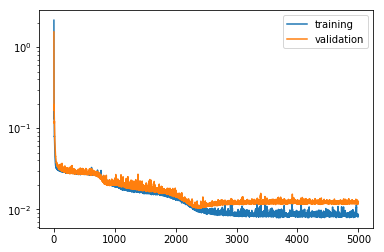

In [14]:
plt.plot(h.history['loss'], label='training')
plt.plot(h.history['val_loss'], label='validation')
plt.yscale('log')
plt.legend();

print(hidden1.get_weights()[0])
print(hidden1.get_weights()[1])

**e)** Plot the data points and the neural network output to see if the model was able to well approoximate the underlying function. If it is not the case then go back to **b)** and try to solve it.

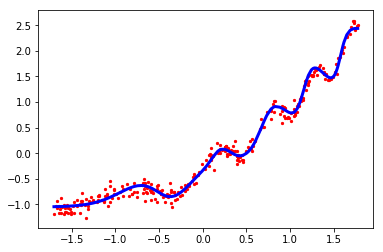

In [6]:
plt.scatter(X, Y, color='red', s=5)
plt.plot(sorted(X), model.predict(sorted(X)), color='b', linewidth=3)

## Exercise 2 (Binary classification)

Now will solve a binary classification task. The training data consists of data points $(x_i,y_i)$ with $x_i \in \mathcal{R}^2$ and $y_i \in \lbrace 0, 1\rbrace$. 

**a)** Generate the data using the methods `make_moons` or `make_circles` from the package `sklearn.datasets`. Plot the data points (blue for class 0 and red for class 1). Also split the data set into training and validation set.

In [7]:
# !! Your code goes here








**b)** Create a neural network using `binary_crossentropy` as loss function and `accuracy` as a metric to evaluate the results and train it using the training set.

In [8]:
# !! Your code goes here








**d)** Plot the training and validation error curves.

In [9]:
# !! Your code goes here








**e)** Plot the data points and color the surface according to the probability of belonging to each class. This should make visible the decision area and its uncertainty.

In [10]:
# !! Your code goes here






